In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


def load_results(file_path):
    """
    Load results from a pickle file.

    Args:
        file_path (str): Path to the pickle file.

    Returns:
        dict: Dictionary containing the loaded results.
    """
    try:
        with open(file_path, 'rb') as f:
            results = pickle.load(f)
        return results
    except Exception as e:
        print(f"Error loading {file_path}: {e}")
        return None 

In [31]:
method = "penalty"#"DC3"##"FSNet" #
prob_type = "convex"
prob_name = "qp"
seed = 2025
#fname = "Problem-100-50-50-10000"
#fname = "Problem-360-432-288-10000"
fname = "Problem-192-238-120-10000"
#dir_path = f"{prob_type}/{prob_name}/{prob_name.upper()}Problem-100-50-50-10000/MLP_{method}/results_seed{seed}.pkl"
#dir_path = f"{prob_type}/{prob_name}/{prob_name.upper()}Problem-192-238-120-1000/MLP_{method}/results_seed{seed}.pkl"
dir_path = f"{prob_type}/{prob_name}/{prob_name.upper()}{fname}/MLP_{method}/results_seed{seed}.pkl"

results = load_results(dir_path)

In [18]:
print(results.keys())
print(results['training_time_seconds'])
results['test_results']['batch_size_comparison']

dict_keys(['seed', 'method', 'config', 'timestamp', 'training_time_seconds', 'train_history', 'val_history', 'test_results', 'pytorch_version', 'device_used'])
123.14951848983765


{256: {'metrics': {'true_objective': 101516.69324376128,
   'opt_gap_max': -0.9997669469204592,
   'eq_violation_l1_mean': 73.6480893701086,
   'eq_violation_l2_mean': 24.780855747020198,
   'ineq_violation_l2_mean': 0.0,
   'ineq_violation_l1_mean': 0.0,
   'objective': 23.44608718594155,
   'ineq_violation_l1_max': 0.0,
   'ineq_violation_max_max': 0.0,
   'ineq_violation_l2_max': 0.0,
   'solution_distance_std': 0.022328788152663037,
   'opt_gap_min': -0.9997707448487367,
   'ineq_violation_max_mean': 0.0,
   'eq_violation_l2_max': 24.991807175728333,
   'eq_violation_max_max': 0.944087217288571,
   'eq_violation_max_mean': 0.9193688624480587,
   'opt_gap_mean': -0.9997690414696225,
   'solution_distance_mean': 101.9351811068903,
   'eq_violation_l1_max': 73.9688818015848,
   'opt_gap_std': 2.2995885862187038e-08,
   'solution_distance_max': 102.94718273441946,
   'total_time': 0.0006237030029296875,
   'avg_inference_time': 0.00031185150146484375},
  'batch_size': 256},
 512: {'met

classical solver solve time
-------------

run this on **LISSI SERVER**

In [ ]:
# run this on LISSI SERVER  datasets/convex/qp dir
import pickle
#filepath = "random2025_qp_dataset_var100_ineq50_eq50_ex10000"
filepath = "random2025_qp_dataset_var192_ineq238_eq120_ex10000"
filepath = "random2025_qp_dataset_var360_ineq432_eq288_ex1000"
with open(filepath, 'rb') as f:
        data = pickle.load(f)
print('solve_time_avg=', data['solve_time_avg'])
print('solve_time_std=', data['solve_time_std']  )

FileNotFoundError: [Errno 2] No such file or directory: 'random2025_qp_dataset_var360_ineq432_eq288_ex1000'

training convergence
------------

<Axes: >

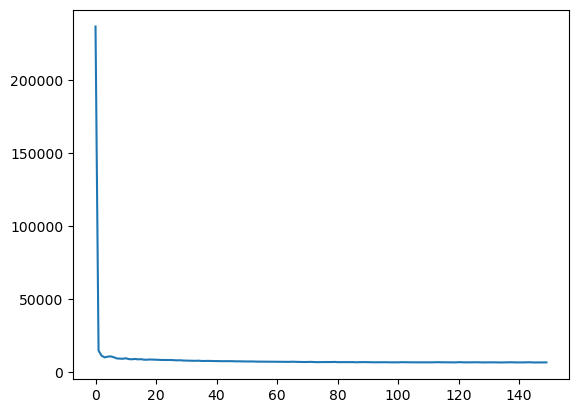

In [32]:
#results['train_history']
df = pd.DataFrame(results['train_history'])
df
df.loss.plot()

training time
-------------

In [20]:
# can be misleading, if nb epoch not adapted 
print(results.keys())
print(results['training_time_seconds'])
print(results['timestamp'])

dict_keys(['seed', 'method', 'config', 'timestamp', 'training_time_seconds', 'train_history', 'val_history', 'test_results', 'pytorch_version', 'device_used'])
123.14951848983765
2026-02-18 15:35:47


In [21]:
# just added 'epoch_time' field
# NB: this is training time, different from inference time below
df = pd.DataFrame(results['train_history'])
try:
   print('training epoch_time.mean=', df.epoch_time.mean() )
except:
   print("df.epoch_time NOT AVAILABLE !!!!!")

training epoch_time.mean= 0.8205177640914917


test-time metrics: 1 algo
---------

In [22]:
def results_to_readable(results):
    # Get batch comparison data from the loaded results
    batch_comparison = results['test_results']['batch_size_comparison']

    # Create a more readable DataFrame by expanding the metrics
    readable_data = []
    for batch_size, data in batch_comparison.items():
        metrics = data['metrics']
        row = {'Method': method,
            'Batch Size': batch_size,
            'Opt Gap Mean (\%)': f"{metrics['opt_gap_mean']*100:.4f}",
            #'Opt Gap Std (\%)': f"{metrics['opt_gap_std']*100:.4f}",
            'Opt Gap Std (\%)': f"{metrics['opt_gap_std']*100:.2e}",
            'Opt Gap Max (\%)': f"{metrics['opt_gap_max']*100:.4f}",
            'Eq Violation Mean': f"{metrics['eq_violation_l1_mean']:.2e}",
            'Eq Violation Max': f"{metrics['eq_violation_l1_max']:.2e}",
            'Ineq Violation Mean': f"{metrics['ineq_violation_l1_mean']:.2e}",
            'Ineq Violation Max': f"{metrics['ineq_violation_l1_max']:.2e}",
            'Average Batch inference time (s)': f"{metrics['avg_inference_time']:.4f}",
        }
        readable_data.append(row)

    df_readable = pd.DataFrame(readable_data)
    return df_readable
df_readable = results_to_readable(results)
df_readable_styled = df_readable.style.set_properties(**{'text-align': 'center'})
display(df_readable_styled)
print(df_readable.T.to_latex())

<>:11: SyntaxWarning: invalid escape sequence '\%'
<>:13: SyntaxWarning: invalid escape sequence '\%'
<>:14: SyntaxWarning: invalid escape sequence '\%'
<>:11: SyntaxWarning: invalid escape sequence '\%'
<>:13: SyntaxWarning: invalid escape sequence '\%'
<>:14: SyntaxWarning: invalid escape sequence '\%'
/tmp/ipykernel_7868/1554352898.py:11: SyntaxWarning: invalid escape sequence '\%'
  'Opt Gap Mean (\%)': f"{metrics['opt_gap_mean']*100:.4f}",
/tmp/ipykernel_7868/1554352898.py:13: SyntaxWarning: invalid escape sequence '\%'
  'Opt Gap Std (\%)': f"{metrics['opt_gap_std']*100:.2e}",
/tmp/ipykernel_7868/1554352898.py:14: SyntaxWarning: invalid escape sequence '\%'
  'Opt Gap Max (\%)': f"{metrics['opt_gap_max']*100:.4f}",


,Method,Batch Size,Opt Gap Mean (\%),Opt Gap Std (\%),Opt Gap Max (\%),Eq Violation Mean,Eq Violation Max,Ineq Violation Mean,Ineq Violation Max,Average Batch inference time (s)
0,penalty,256,-99.9769,2.30e-06,-99.9767,7.36e+01,7.40e+01,0.00e+00,0.00e+00,0.0003
1,penalty,512,-99.9769,0.00e+00,-99.9767,7.36e+01,7.40e+01,0.00e+00,0.00e+00,0.0003


\begin{tabular}{lll}
\toprule
 & 0 & 1 \\
\midrule
Method & penalty & penalty \\
Batch Size & 256 & 512 \\
Opt Gap Mean (\%) & -99.9769 & -99.9769 \\
Opt Gap Std (\%) & 2.30e-06 & 0.00e+00 \\
Opt Gap Max (\%) & -99.9767 & -99.9767 \\
Eq Violation Mean & 7.36e+01 & 7.36e+01 \\
Eq Violation Max & 7.40e+01 & 7.40e+01 \\
Ineq Violation Mean & 0.00e+00 & 0.00e+00 \\
Ineq Violation Max & 0.00e+00 & 0.00e+00 \\
Average Batch inference time (s) & 0.0003 & 0.0003 \\
\bottomrule
\end{tabular}



test-time metrics: all algo
---------

In [28]:
row_l = []
seed = 2025
#algo_l = ['DC3','FSNet','skm']
#algo_l = ['penalty','FSNet','DC3','skm']
algo_l = ['penalty','DC3','skm']
#algo_l = ['penalty','skm']
batch_size = 256
#fname = "Problem-100-50-50-10000"
fname = "Problem-192-238-120-10000"
#fname ="Problem-360-432-288-10000"
for method in algo_l:
    #dir_path = f"{prob_type}/{prob_name}/{prob_name.upper()}Problem-100-50-50-10000/MLP_{method}/results_seed{seed}.pkl"
    #dir_path = f"{prob_type}/{prob_name}/{prob_name.upper()}Problem-192-238-120-1000/MLP_{method}/results_seed{seed}.pkl"
    dir_path = f"{prob_type}/{prob_name}/{prob_name.upper()}{fname}/MLP_{method}/results_seed{seed}.pkl"
    print(dir_path)
    results = load_results(dir_path)
    # Get batch comparison data from the loaded results
    batch_comparison = results['test_results']['batch_size_comparison']
    # get only batchsize 256
    metrics = (results['test_results']['batch_size_comparison'].pop(batch_size))['metrics']
    # AH !!!!!!
    avg_sample_time = metrics['avg_inference_time']/batch_size
    row = {
        'Algorithm': method,
            'Opt Gap Mean (\%)': f"{metrics['opt_gap_mean']*100:.4f}",
            #'Opt Gap Std (\%)': f"{metrics['opt_gap_std']*100:.4f}",
            #'Opt Gap Std (\%)': f"{metrics['opt_gap_std']*100:.2e}",
            'Opt Gap Max (\%)': f"{metrics['opt_gap_max']*100:.4f}",
            'Eq Viol Mean': f"{metrics['eq_violation_l1_mean']:.2e}",
            'Eq Viol Max': f"{metrics['eq_violation_l1_max']:.2e}",
            'Ineq Viol Mean': f"{metrics['ineq_violation_l1_mean']:.2e}",
            'Ineq Viol Max': f"{metrics['ineq_violation_l1_max']:.2e}",
            'Sample inference time (s)': f"{avg_sample_time:.2e}",
            'Train time(s)':   f"{results['training_time_seconds']:.2e}"
        
    }
    row_l.append(row)

df = pd.DataFrame(row_l)
#print(df)
print(df.T.to_latex())

<>:25: SyntaxWarning: invalid escape sequence '\%'
<>:28: SyntaxWarning: invalid escape sequence '\%'
<>:25: SyntaxWarning: invalid escape sequence '\%'
<>:28: SyntaxWarning: invalid escape sequence '\%'
/tmp/ipykernel_7868/1774714657.py:25: SyntaxWarning: invalid escape sequence '\%'
  'Opt Gap Mean (\%)': f"{metrics['opt_gap_mean']*100:.4f}",
/tmp/ipykernel_7868/1774714657.py:28: SyntaxWarning: invalid escape sequence '\%'
  'Opt Gap Max (\%)': f"{metrics['opt_gap_max']*100:.4f}",


convex/qp/QPProblem-192-238-120-10000/MLP_penalty/results_seed2025.pkl
convex/qp/QPProblem-192-238-120-10000/MLP_DC3/results_seed2025.pkl
convex/qp/QPProblem-192-238-120-10000/MLP_skm/results_seed2025.pkl
\begin{tabular}{llll}
\toprule
 & 0 & 1 & 2 \\
\midrule
Algorithm & penalty & DC3 & skm \\
Opt Gap Mean (\%) & -2.8059 & -0.0551 & 0.2545 \\
Opt Gap Max (\%) & -1.8974 & 0.1124 & 0.3764 \\
Eq Viol Mean & 2.23e+01 & 5.77e-13 & 5.33e-13 \\
Eq Viol Max & 2.69e+01 & 8.09e-13 & 6.76e-13 \\
Ineq Viol Mean & 1.55e-01 & 6.19e+00 & 2.21e-12 \\
Ineq Viol Max & 2.40e-01 & 8.88e+00 & 5.64e-10 \\
Sample inference time (s) & 1.17e-06 & 1.87e-04 & 3.28e-03 \\
Train time(s) & 1.26e+02 & 2.30e+02 & 1.30e+02 \\
\bottomrule
\end{tabular}



seed variability
------------------

In [ ]:

seed_l = [2025,2025]
row_l = []
for seed in seed_l:
    #dir_path = f"{prob_type}/{prob_name}/{prob_name.upper()}Problem-100-50-50-10000/MLP_{method}/results_seed{seed}.pkl"
    #dir_path = f"{prob_type}/{prob_name}/{prob_name.upper()}Problem-192-238-120-1000/MLP_{method}/results_seed{seed}.pkl"
    dir_path = f"{prob_type}/{prob_name}/{prob_name.upper()}{fname}/MLP_{method}/results_seed{seed}.pkl"
    results = load_results(dir_path)
    # Get batch comparison data from the loaded results
    batch_comparison = results['test_results']['batch_size_comparison']
    # get only batchsize 256
    metrics = (results['test_results']['batch_size_comparison'].pop(256))['metrics']
    # 
    row = {
        'Opt Gap Mean (%)': metrics['opt_gap_mean']*100,
        'Opt Gap Std (%)': metrics['opt_gap_std']*100,
        'Opt Gap Max (%)': metrics['opt_gap_max']*100,
        'Eq Violation Mean': metrics['eq_violation_l1_mean'],
        'Eq Violation Max': metrics['eq_violation_l1_max'],
        'Ineq Violation Mean': metrics['ineq_violation_l1_mean'],
        'Ineq Violation Max': metrics['ineq_violation_l1_max'],
        'Average Batch inference Time (s)': metrics['avg_inference_time'],
    }
    row_l.append(row)

df = pd.DataFrame(row_l)
#print(df)
print('STD over realizations:\n')
print(df.std(axis=0).T)

STD over realizations:

Opt Gap Mean (%)                    0.0
Opt Gap Std (%)                     0.0
Opt Gap Max (%)                     0.0
Eq Violation Mean                   0.0
Eq Violation Max                    0.0
Ineq Violation Mean                 0.0
Ineq Violation Max                  0.0
Average Batch inference Time (s)    0.0
dtype: float64


In [46]:
metrics

{'ineq_violation_l1_mean': 7.579644772244737,
 'eq_violation_l1_max': 7.6996463896565e-13,
 'opt_gap_mean': 0.003252167389391278,
 'opt_gap_std': 0.0,
 'eq_violation_l2_max': 2.2994219401745706e-26,
 'ineq_violation_l1_max': 11.553908975497043,
 'solution_distance_max': 1249.8390866023585,
 'eq_violation_l1_mean': 5.506841251732192e-13,
 'opt_gap_min': 0.0010788242820738859,
 'ineq_violation_l2_max': 15.61398690267724,
 'ineq_violation_max_max': 3.07336031011288,
 'solution_distance_mean': 572.142935063266,
 'objective': 6587.043134130591,
 'opt_gap_max': 0.005391351267692645,
 'eq_violation_l2_mean': 7.480583341440109e-27,
 'solution_distance_std': 0.0,
 'ineq_violation_max_mean': 1.5459588320440505,
 'eq_violation_max_mean': 3.432809592140984e-14,
 'eq_violation_max_max': 8.881784197001252e-14,
 'true_objective': 6565.725084424895,
 'ineq_violation_l2_mean': 7.4865112796324915,
 'total_time': 0.24605822563171387,
 'avg_inference_time': 0.24605822563171387}